In [23]:
import pandas as pd

In [24]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [25]:
df_brl = pd.read_parquet('../data/all_comm/comm_brl.parquet')
df_usd = pd.read_parquet('../data/all_comm/comm_usd.parquet')

In [26]:
Y_test_df_brl = df_brl.groupby('unique_id').tail(24)
remaining = df_brl.drop(Y_test_df_brl.index, axis = 0)
X_val_df_brl = remaining.groupby('unique_id').tail(12)
X_train_df_brl = remaining.drop(X_val_df_brl.index, axis=0)

In [27]:
X_train_df_brl.head()

,ds,y,unique_id
0,2003-05-01,28.156667,ACUCAR
1,2003-06-01,25.092000,ACUCAR
2,2003-07-01,23.928636,ACUCAR
3,2003-08-01,29.410000,ACUCAR
4,2003-09-01,24.313636,ACUCAR


In [28]:
from statsforecast import StatsForecast
                
from statsforecast.models import (
    Naive,
    AutoARIMA
)

In [29]:
models = [
    Naive(),
    AutoARIMA(season_length=12)
]

In [30]:
sf = StatsForecast( 
    models=models,
    freq='ME',
)

In [31]:
forecasts_val = sf.forecast(df=X_train_df_brl, h=12, fitted=True)
forecasts_val.head(12)

,unique_id,ds,Naive,AutoARIMA
0,ACUCAR,2022-02-28,144.78,141.706969
1,ACUCAR,2022-03-31,144.78,141.694958
2,ACUCAR,2022-04-30,144.78,142.449878
3,ACUCAR,2022-05-31,144.78,142.879406
4,ACUCAR,2022-06-30,144.78,143.020806
5,ACUCAR,2022-07-31,144.78,145.034143
6,ACUCAR,2022-08-31,144.78,147.255139
7,ACUCAR,2022-09-30,144.78,148.489071
8,ACUCAR,2022-10-31,144.78,150.358807
9,ACUCAR,2022-11-30,144.78,150.653070


In [32]:
full_train = pd.concat([X_train_df_brl, X_val_df_brl])
forecasts_test = sf.forecast(df=full_train, h=24, fitted=True)

In [33]:
insample_forecasts = sf.forecast_fitted_values()
insample_forecasts.head(10)

,unique_id,ds,y,Naive,AutoARIMA
0,ACUCAR,2003-05-01,28.156667,NaN,28.128510
1,ACUCAR,2003-06-01,25.092000,28.156667,27.770887
2,ACUCAR,2003-07-01,23.928636,25.092000,23.824496
3,ACUCAR,2003-08-01,29.410000,23.928636,24.079414
4,ACUCAR,2003-09-01,24.313636,29.410000,32.159257
5,ACUCAR,2003-10-01,21.140435,24.313636,20.113904
6,ACUCAR,2003-11-01,20.375500,21.140435,21.679392
7,ACUCAR,2003-12-01,21.424500,20.375500,19.691115
8,ACUCAR,2004-01-01,19.659524,21.424500,22.330977
9,ACUCAR,2004-02-01,18.176111,19.659524,18.222120


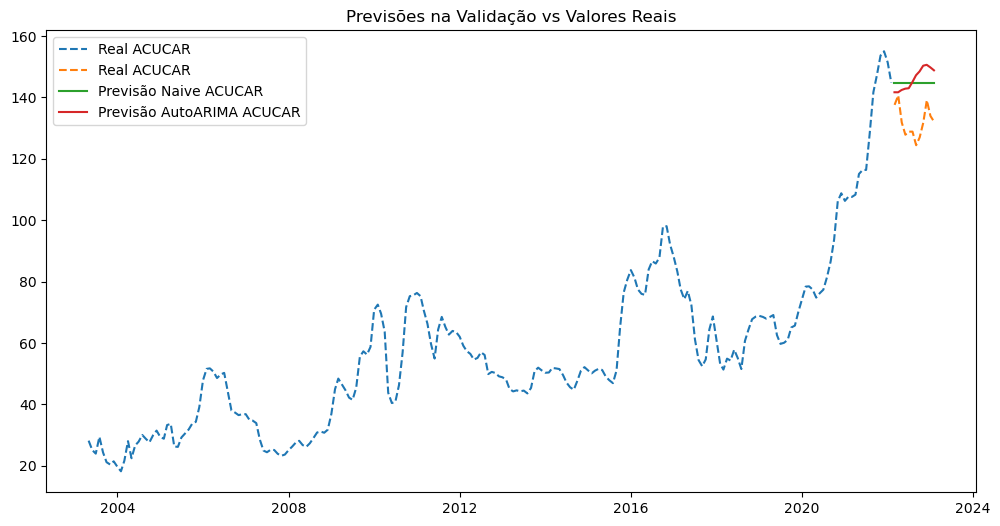

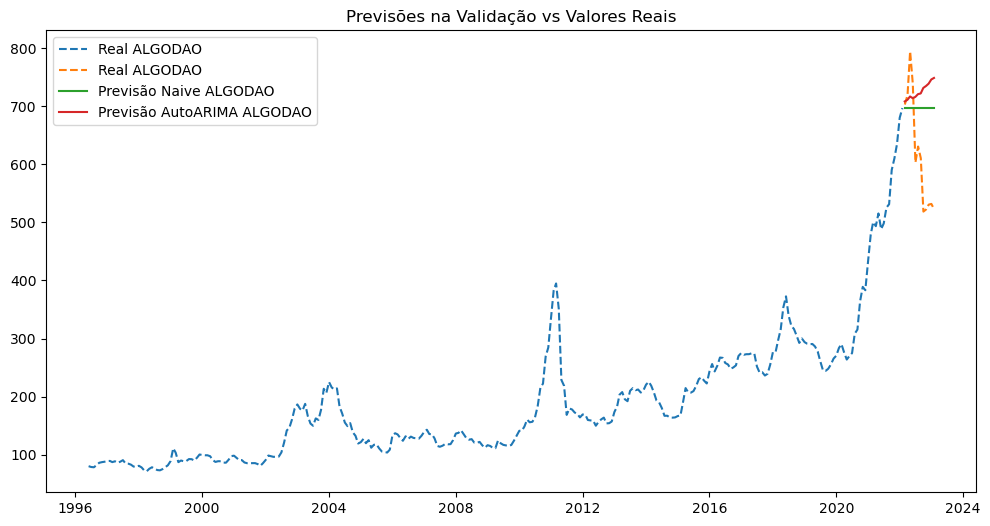

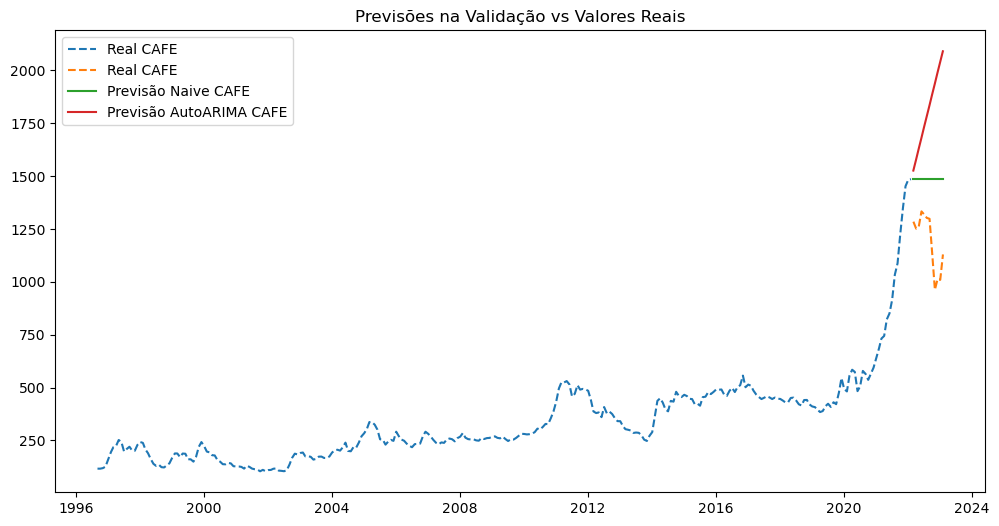

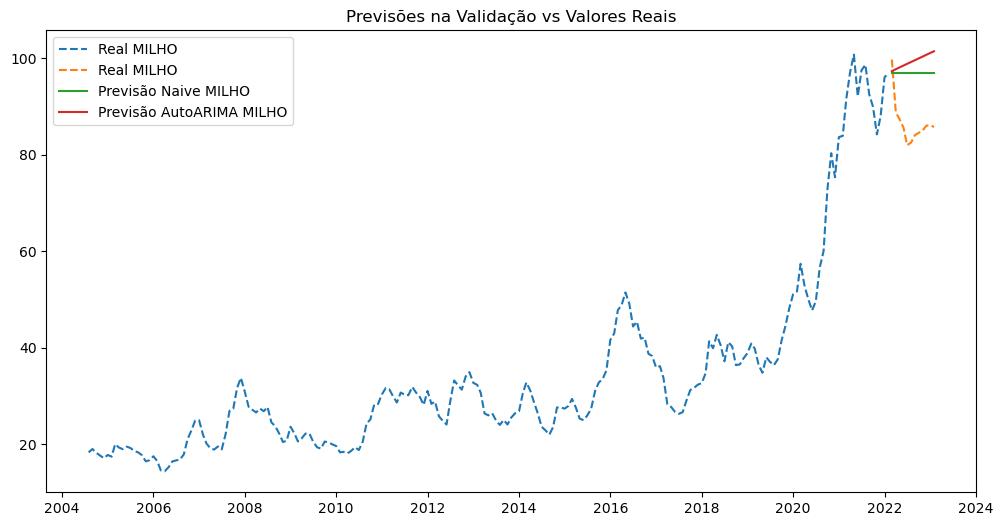

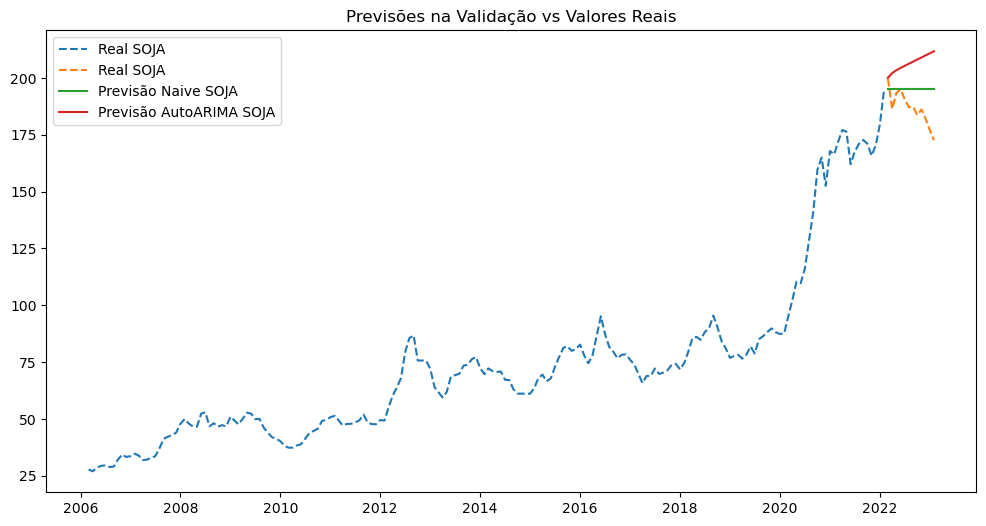

In [ ]:
import matplotlib.pyplot as plt

for unique_id in X_val_df_brl['unique_id'].unique():
    plt.figure(figsize=(12, 6))
    plt.plot(X_train_df_brl[X_train_df_brl['unique_id'] == unique_id]['ds'],
             X_train_df_brl[X_train_df_brl['unique_id'] == unique_id]['y'], 
             label=f'Real {unique_id}', linestyle='--')
    
    plt.plot(X_val_df_brl[X_val_df_brl['unique_id'] == unique_id]['ds'],
             X_val_df_brl[X_val_df_brl['unique_id'] == unique_id]['y'], 
             label=f'Real {unique_id}', linestyle='--')

    
    plt.plot(forecasts_val[forecasts_val['unique_id'] == unique_id]['ds'],
             forecasts_val[forecasts_val['unique_id'] == unique_id]['Naive'],
             label=f'Previsão Naive {unique_id}')
    
    plt.plot(forecasts_val[forecasts_val['unique_id'] == unique_id]['ds'],
             forecasts_val[forecasts_val['unique_id'] == unique_id]['AutoARIMA'],
             label=f'Previsão AutoARIMA {unique_id}')

    plt.legend()
    plt.title('Previsões na Validação vs Valores Reais')
    plt.show()

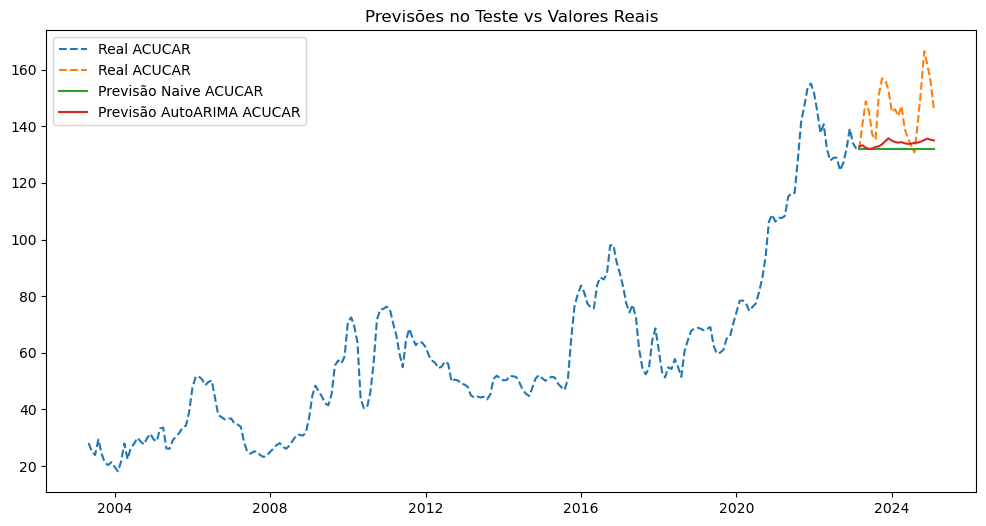

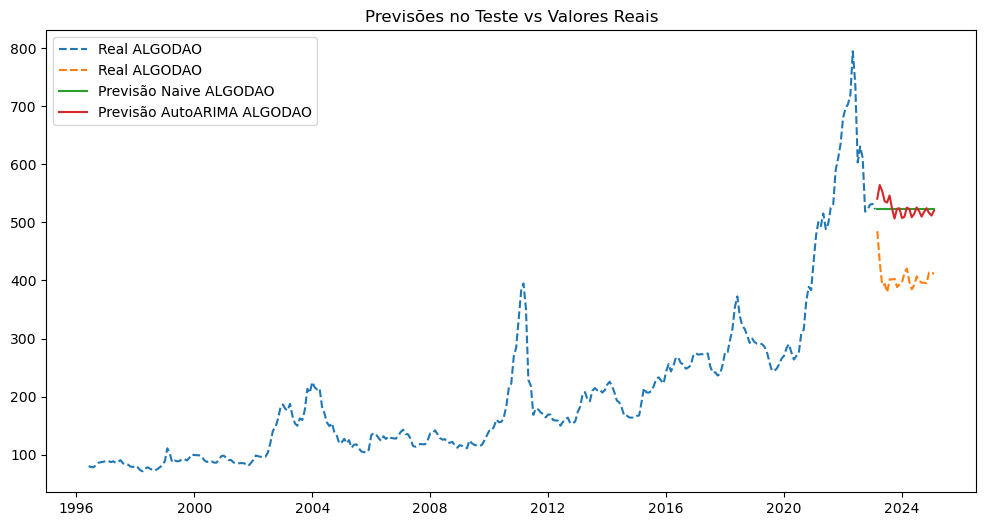

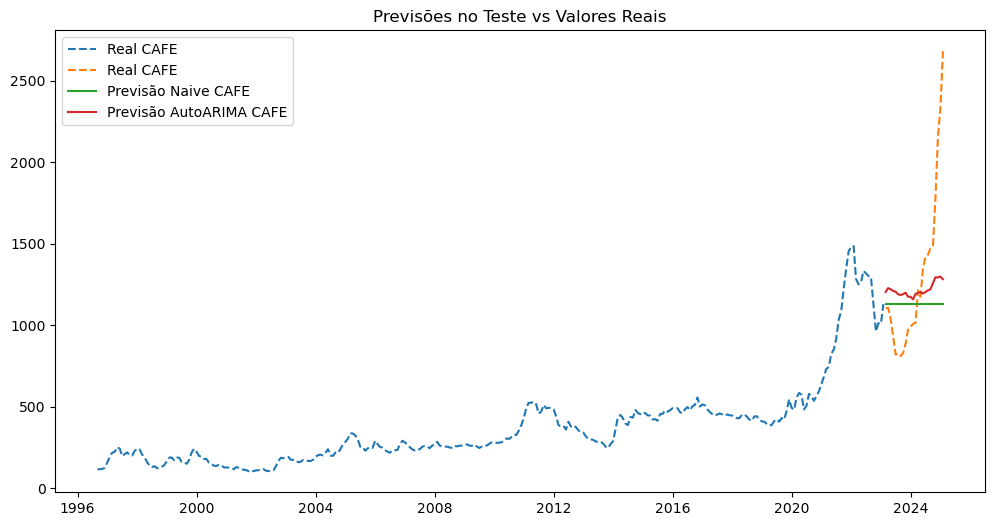

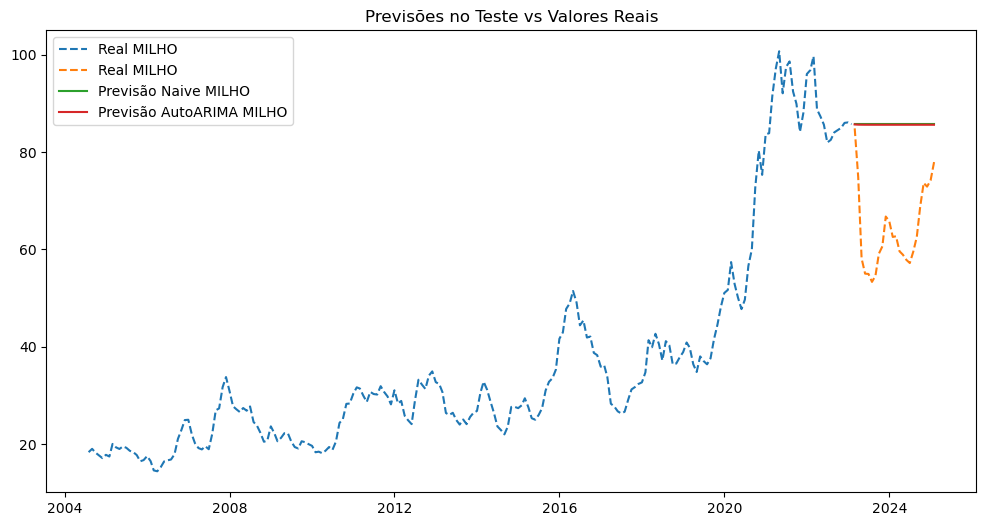

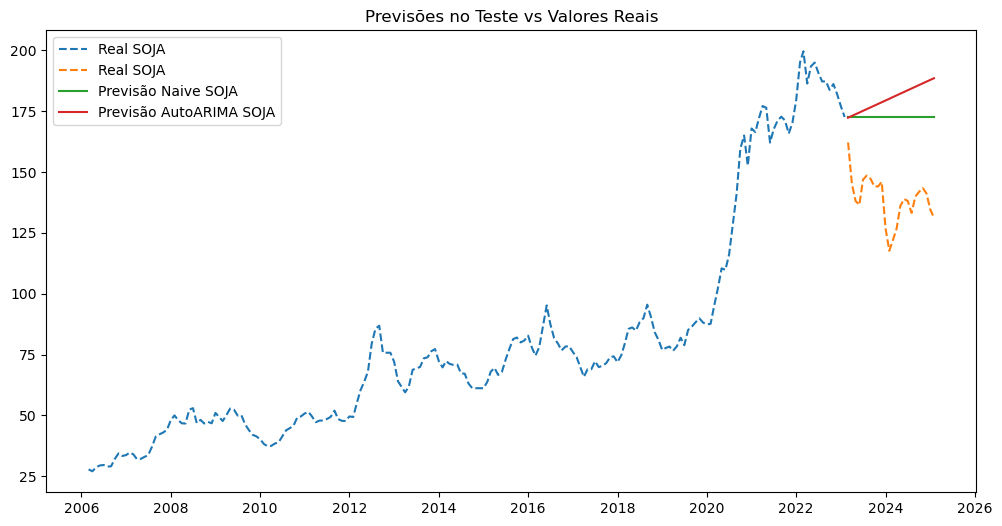

In [ ]:
for unique_id in Y_test_df_brl['unique_id'].unique():
    plt.figure(figsize=(12, 6))
    plt.plot(full_train[full_train['unique_id'] == unique_id]['ds'],
             full_train[full_train['unique_id'] == unique_id]['y'], 
             label=f'Real {unique_id}', linestyle='--')
    
    plt.plot(Y_test_df_brl[Y_test_df_brl['unique_id'] == unique_id]['ds'],
             Y_test_df_brl[Y_test_df_brl['unique_id'] == unique_id]['y'], 
             label=f'Real {unique_id}', linestyle='--')

    
    plt.plot(forecasts_test[forecasts_test['unique_id'] == unique_id]['ds'],
             forecasts_test[forecasts_test['unique_id'] == unique_id]['Naive'],
             label=f'Previsão Naive {unique_id}')
    
    plt.plot(forecasts_test[forecasts_test['unique_id'] == unique_id]['ds'],
             forecasts_test[forecasts_test['unique_id'] == unique_id]['AutoARIMA'],
             label=f'Previsão AutoARIMA {unique_id}')

    plt.legend()
    plt.title('Previsões no Teste vs Valores Reais')
    plt.show()

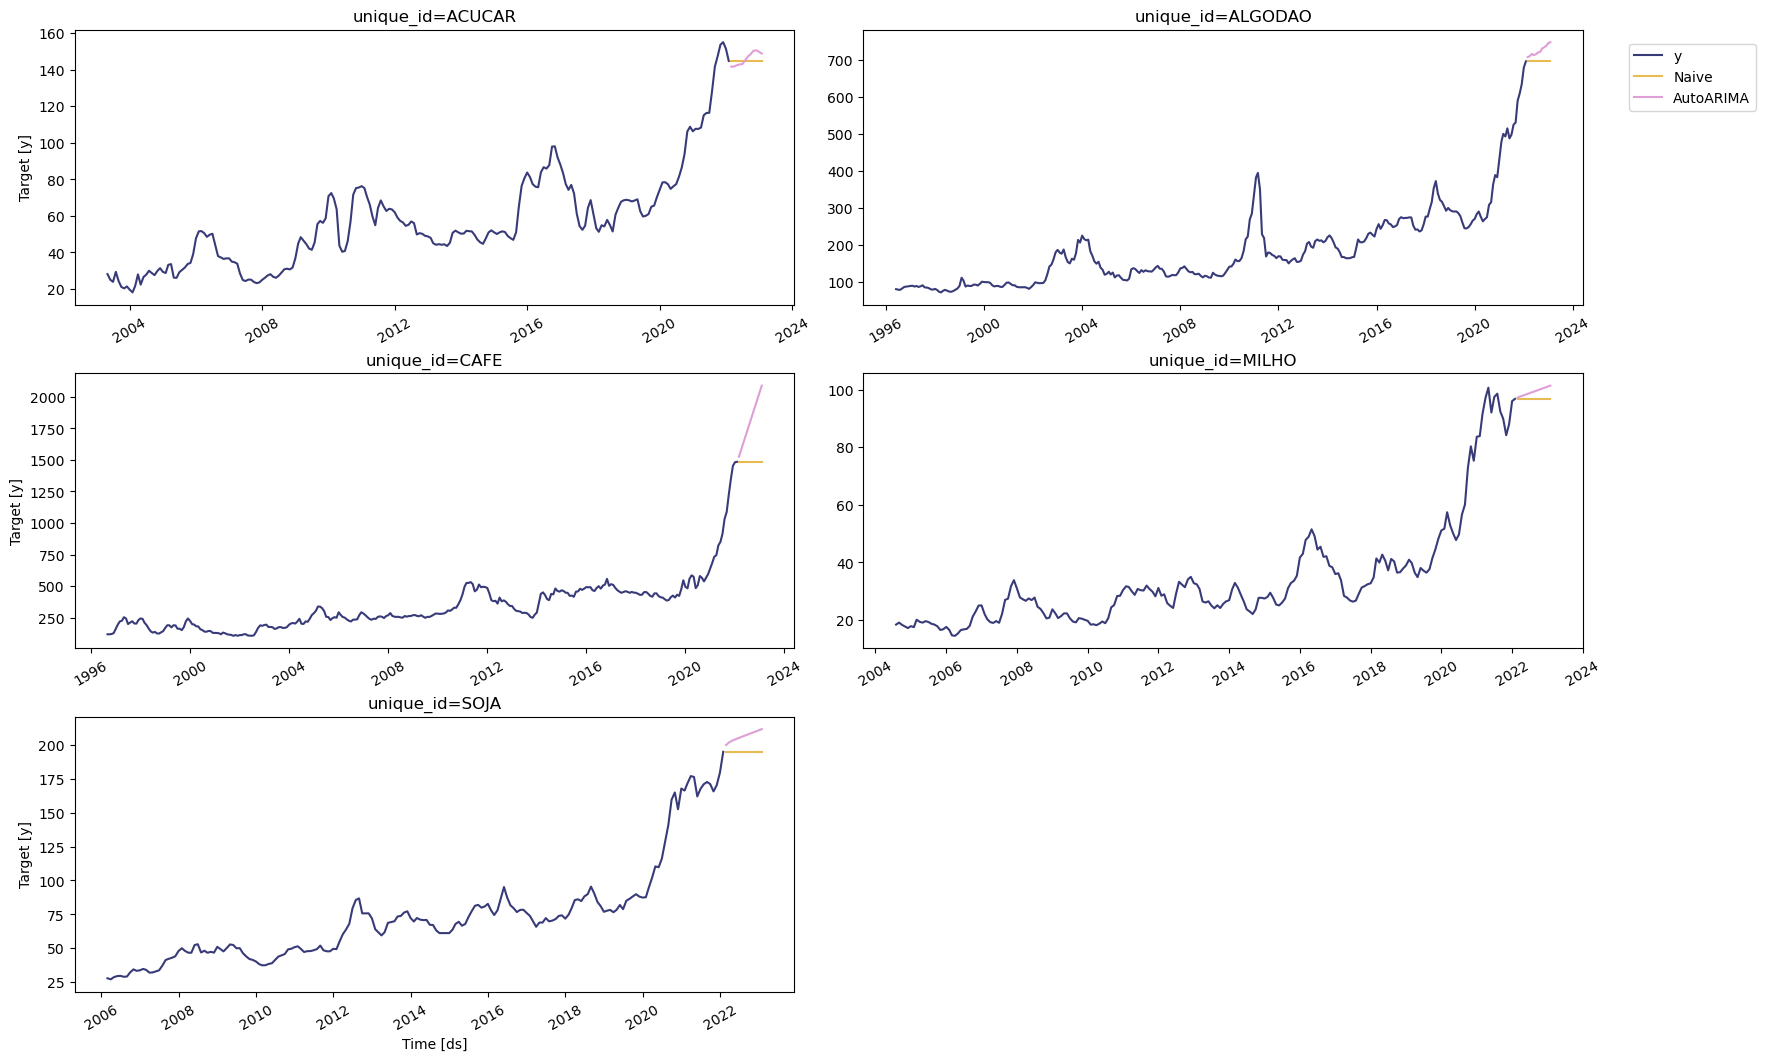

In [38]:
sf.plot(X_train_df_brl,forecasts_val)

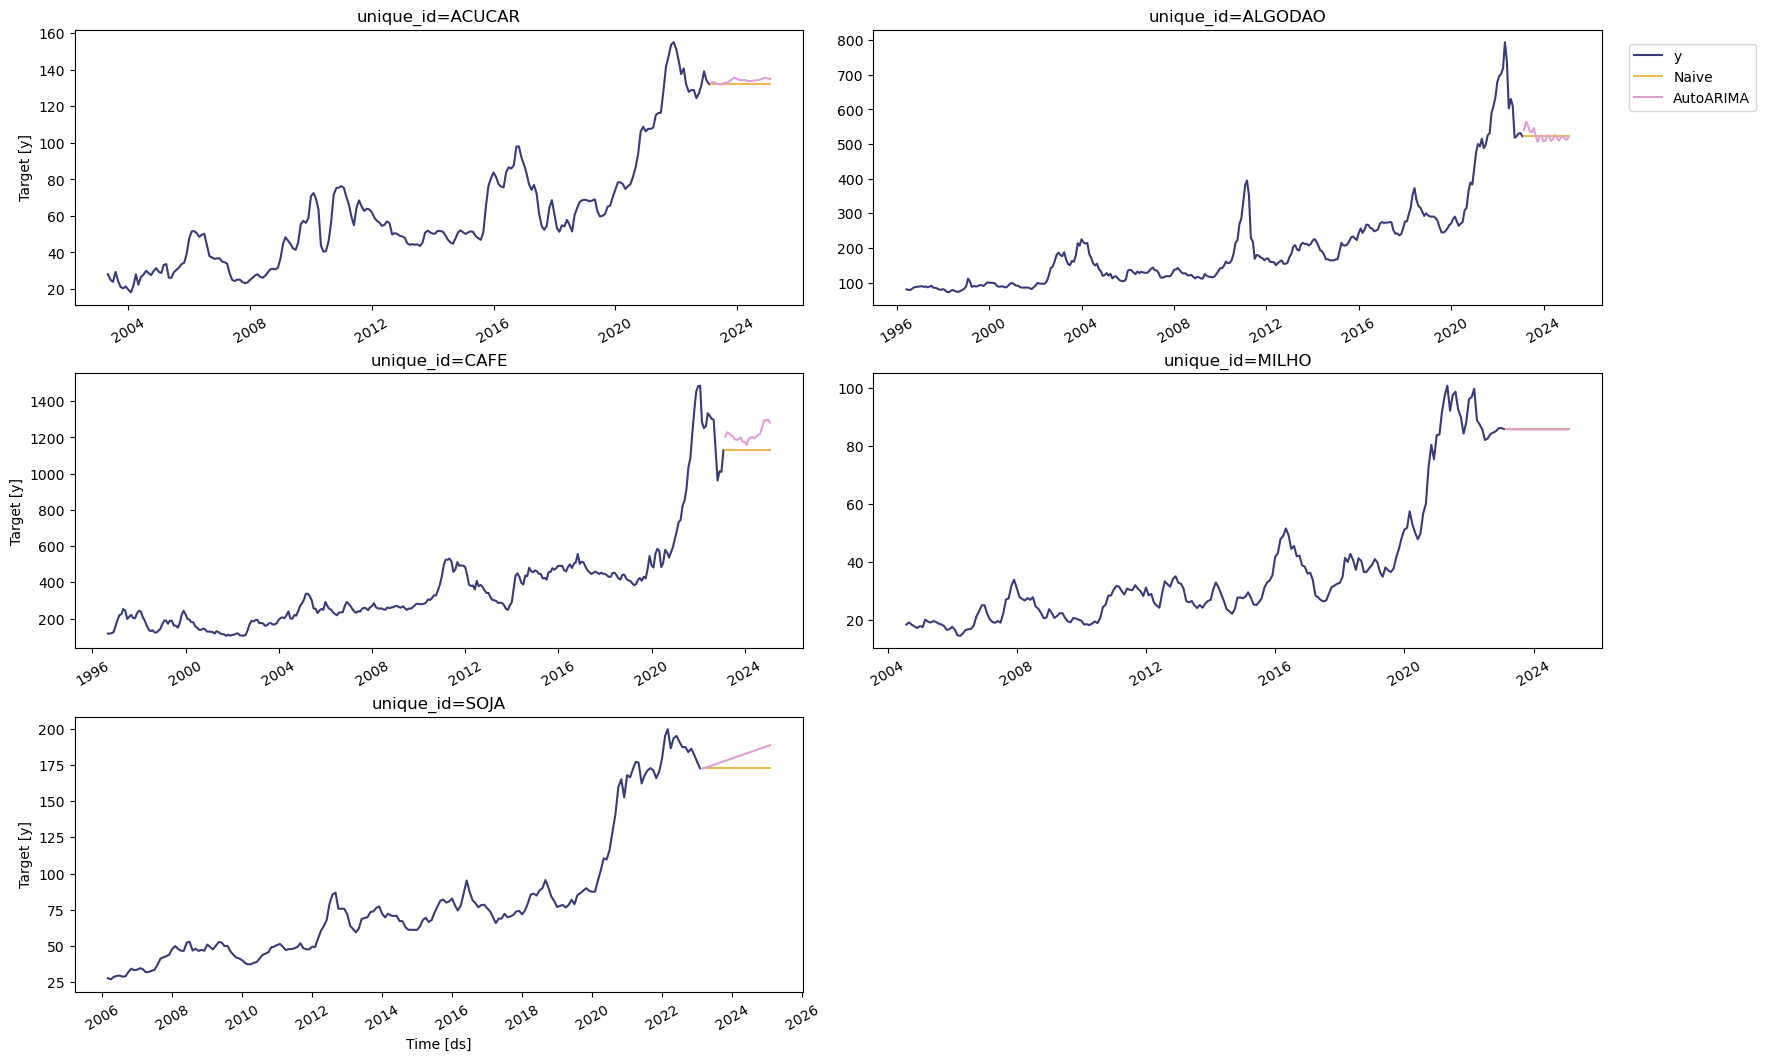

In [37]:
sf.plot(full_train,forecasts_test)